# Pyber Data Analysis
_____

### Trend Analysis
________

### 1. Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Load Dataframes objects

In [2]:
city = pd.read_csv('resources/city_data.csv')
city.head(3)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban


In [3]:
ride = pd.read_csv('resources/ride_data.csv', parse_dates=['date'])
ride.head(3)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003


In [4]:
combined = ride.merge(right=city, how='left', on='city')
combined.head(3)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban


In [5]:
print(f'City Dataframe : {city.shape}')
print(f'Ride Dataframe : {ride.shape}')
print(f'Combined Dataframe : {combined.shape}')

City Dataframe : (120, 3)
Ride Dataframe : (2375, 4)
Combined Dataframe : (2375, 6)


In [6]:
combined['type']= combined['type'].astype('category')

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null datetime64[ns]
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 113.7+ KB


#### 3. Bubble Plot of Ride Sharing Data

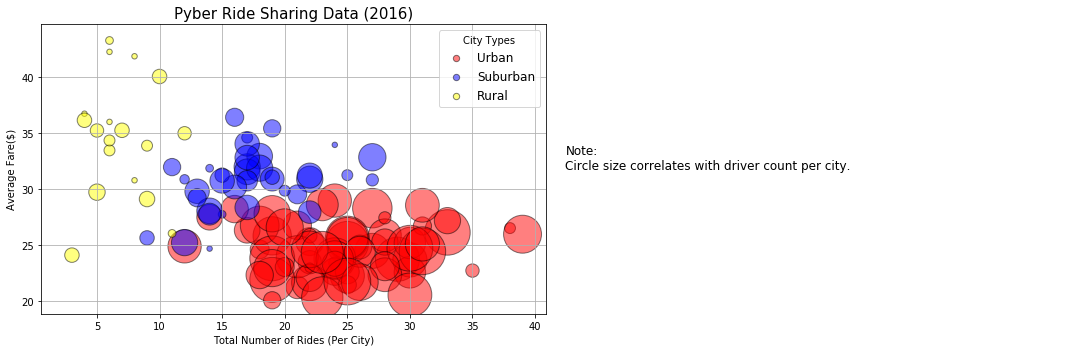

In [8]:
columns = ['type', 'city', 'ride_id', 'fare', 'driver_count']    

type_city_grp = combined[columns].groupby(by=['type', 'city']).agg({ 'ride_id': ['count'],
                                           'fare' : ['mean'],
                                           'driver_count' : ['max']
})   

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)

ax_msg = fig.add_subplot(1, 2, 2, frameon=False)
ax_msg.get_xaxis().set_visible(False)
ax_msg.get_yaxis().set_visible(False)

msg = 'Note:\nCircle size correlates with driver count per city.'
ax_msg.text(0.01, 0.5, msg, fontsize=12,horizontalalignment='left')


ax.scatter(x=type_city_grp.loc['Urban']['ride_id'], y=type_city_grp.loc['Urban']['fare'], s=type_city_grp.loc['Urban']['driver_count']*30, alpha=0.5, c='red', linewidth=1, edgecolors='black', label='Urban')
ax.scatter(x=type_city_grp.loc['Suburban']['ride_id'], y=type_city_grp.loc['Suburban']['fare'], s=type_city_grp.loc['Suburban']['driver_count']*30, alpha=0.5, c='blue', linewidth=1, edgecolors='black', label='Suburban')
ax.scatter(x=type_city_grp.loc['Rural']['ride_id'], y=type_city_grp.loc['Rural']['fare'], s=type_city_grp.loc['Rural']['driver_count']*30, alpha=0.5, c='yellow', linewidth=1, edgecolors='black', label='Rural',)

ax.set_title('Pyber Ride Sharing Data (2016)',{'fontsize' : 15})
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare($)')

legend = ax.legend(loc='upper right', fontsize='large', title='City Types',frameon=True)

for l in legend.legendHandles:
    l._sizes=[40]

ax.grid(True)

fig.tight_layout()
fig.savefig('output/sharing_data_2016.png')

#### 4. Total Fares by City Type

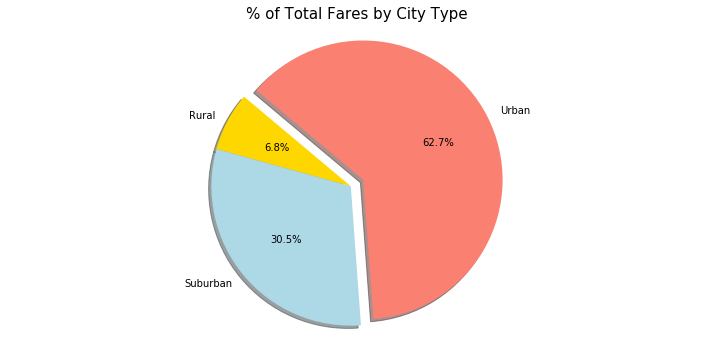

In [9]:
columns = ['type', 'fare']    
colors = ["gold", "lightblue", "salmon"]
explode = (0, 0, 0.1) 


fares_city_grp = combined[columns].groupby(by=['type']).agg({ 'fare' : ['sum']})

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.pie(fares_city_grp['fare'], explode=explode, labels=fares_city_grp.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_title('% of Total Fares by City Type', fontsize=15)
ax.axis('equal')

fig.tight_layout()

#### 5. Total Rides by City Type

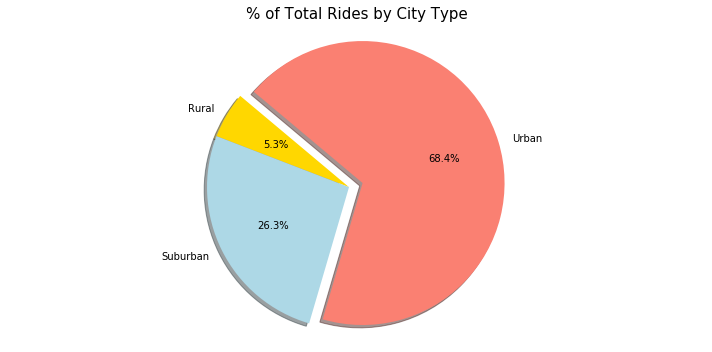

In [10]:
colors = ["gold", "lightblue", "salmon"]
explode = (0, 0, 0.1) 
columns = ['type', 'ride_id']    

rides_city_grp = combined[columns].groupby(by=['type']).agg({ 'ride_id' : ['count']})

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.pie(rides_city_grp['ride_id'], explode=explode, labels=rides_city_grp.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_title('% of Total Rides by City Type', fontsize=15)
ax.axis('equal')

fig.tight_layout()

#### 6. Total Drivers by City Type

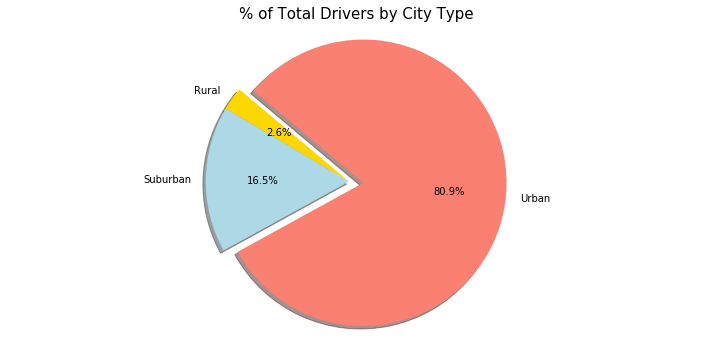

In [11]:
colors = ["gold", "lightblue", "salmon"]
explode = (0, 0, 0.1) 
columns = ['type', 'driver_count']    

driver_city_grp = city[columns].groupby(by=['type']).agg({ 'driver_count' : ['sum']})


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.pie(driver_city_grp['driver_count'], explode=explode, labels=rides_city_grp.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
ax.set_title('% of Total Drivers by City Type', fontsize=15)
ax.axis('equal')

fig.tight_layout()